In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

DB_SCHEMA = """
Database: PostgreSQL 16 with PostGIS

Tables:
- buildings
  - bin: building id number
  - base_bbl
  - mapp_bbl
  - doitt_id
  - feat_code
  - laststatus
  - borocode
  - shape_area
  - shape_leng
  - geom
  - built_year
  - ground_ele: Ground elevation
  - heightroof
  - small_n: small neighborhood
  - small_n_a: small neighborhood abbreviation
"""

def make_user_input(query: str) -> list:
    return [
        {
            "role": "system",
            "content": "You translate natural-language questions into the most relevant column in the PostgreSQL db table: buildings."
        },
        {
            "role": "user",
            "content": f"Schema:\n{DB_SCHEMA}\n\nTask:provide exactly one word output: the column name based on the query'{query}'"
				}
    ]

def get_column_from_query():
    q = input("Query: ").strip()
    resp = client.responses.create(
        model="gpt-5-nano",
        input=make_user_input(q)
    )
    
    column = resp.output_text.strip()
    usage = resp.usage
    return {
        "column": column,
        "usage": {
            "total": usage.total_tokens,
            "input": usage.input_tokens,
            "output": usage.output_tokens
        }
    }

small_n
user query=i want to find out which place in nyc I wanna live
tokens_total=560
tokens_input=168
tokens_output=392


In [1]:
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [2]:
load_dotenv(dotenv_path="../.env")
db_url = os.getenv('db_url')
engine = create_engine(db_url)

In [3]:
gdf = gpd.read_postgis(
    sql="SELECT * FROM public.buildings",
    con=engine,
    geom_col="geom"
)

gdf

,bin,base_bbl,mapp_bbl,doitt_id,feat_code,laststatus,borocode,shape_area,shape_leng,geom,...,bld_value_2024,gross_sqft,res_gross_sqft,avg_prop_value_2025,bld_story,zoning,bldg_class,avg_prop_value_2024,value_sqft_2025,value_sqft_2024
0,2108249,2053530017,2053530017,860581,5110,Constructed,2,37.648438,24.916390,"MULTIPOLYGON (((-73.83209 40.83803, -73.83215 ...",...,2245000.0,3864.0,0.0,587000.0,2.0,R4A,A2,561250.0,607.660455,581.004141
1,3028973,3011620069,3011620069,616225,2100,Constructed,3,182.882812,68.214873,"MULTIPOLYGON (((-73.9611 40.67531, -73.96113 4...",...,9874000.0,38880.0,38880.0,1314500.0,4.0,R6B,C3,1234250.0,270.473251,253.960905
2,3379854,3026990021,3026990021,1231950,5110,Constructed,3,49.968750,28.869571,"MULTIPOLYGON (((-73.94776 40.72222, -73.94778 ...",...,5271000.0,4704.0,0.0,1280750.0,2.0,R6B,B2,1317750.0,1089.073129,1120.535714
3,3088697,3039880006,3039880006,98031,2100,Constructed,3,145.078125,54.938862,"MULTIPOLYGON (((-73.88181 40.67565, -73.88199 ...",...,5640000.0,13328.0,0.0,711750.0,2.0,R5B,B2,705000.0,427.220888,423.169268
4,3093036,3041510045,3041510045,133205,2100,Constructed,3,147.289062,54.188220,"MULTIPOLYGON (((-73.8675 40.68394, -73.86767 4...",...,4818000.0,11456.0,0.0,648000.0,2.0,R5,B3,602250.0,452.513966,420.565642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082077,4038272,4015300017,4015300017,1189180,2100,Constructed,4,102.425781,39.972856,"MULTIPOLYGON (((-73.88738 40.74091, -73.88744 ...",...,5000000.0,17696.0,0.0,652750.0,3.0,R4,M9,625000.0,295.094937,282.549729
1082078,4617963,4015300021,4015300021,1282808,2100,Constructed,4,121.796875,55.777031,"MULTIPOLYGON (((-73.88726 40.74091, -73.8872 4...",...,6182000.0,13408.0,0.0,848000.0,3.0,R4,B1,772750.0,505.966587,461.068019
1082079,4544145,4015300030,4015300030,1077734,5110,Constructed,4,41.609375,26.160886,"MULTIPOLYGON (((-73.88659 40.74086, -73.8866 4...",...,3527000.0,5792.0,0.0,899500.0,2.0,R4,A1,881750.0,621.201657,608.943370
1082080,4038278,4015300030,4015300030,716057,2100,Constructed,4,133.492188,53.373762,"MULTIPOLYGON (((-73.88647 40.74108, -73.88653 ...",...,3527000.0,5792.0,0.0,899500.0,2.0,R4,A1,881750.0,621.201657,608.943370


In [4]:
gdf['large_n'].unique()

array(['central bronx', 'central brooklyn', 'north brooklyn',
       'east brooklyn', 'northwest queens', 'south bronx', 'west bronx',
       'downtown manhattan', 'midtown manhattan', 'south brooklyn',
       'southeast queens', 'north shore staten island',
       'south shore staten island', 'uptown manhattan', 'central queens',
       'east bronx', 'northeast queens', 'way uptown manhattan',
       'mid staten island', 'western queens', 'east shore staten island',
       'rockaways queens', 'special queens', None], dtype=object)

In [9]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import geopandas as gpd

load_dotenv(dotenv_path="../.env")

DB_URL = os.getenv("db_url")
engine = create_engine(DB_URL)

def get_data(column, neighborhood):
    if column == "there is no appropriate data for your query":
        print("no column found")
        return {
            "gdf": None,
            "error": column
        }

    try:
        sql = f"SELECT {column}, geom FROM buildings WHERE large_n = '{neighborhood}'"
        gdf = gpd.read_postgis(sql, con=engine, geom_col="geom")
        print("data retrieved from db")
        return {
            "gdf": gdf,
            "error": None
        }
    except Exception:
        print("failed to retrieve data")
        return {
            "gdf": None,
            "error": "failed to retrieve data"
        }
    
get_data("heightroof", "midtown manhattan")

data retrieved from db


{'gdf':       heightroof                                               geom
 0      42.560006  MULTIPOLYGON (((-73.99023 40.75323, -73.99039 ...
 1     150.000000  MULTIPOLYGON (((-73.98416 40.73969, -73.98431 ...
 2     153.620000  MULTIPOLYGON (((-73.97347 40.74726, -73.9735 4...
 3      59.037532  MULTIPOLYGON (((-74.00165 40.74055, -74.00165 ...
 4      54.210000  MULTIPOLYGON (((-73.96712 40.75458, -73.96721 ...
 ...          ...                                                ...
 9701   48.810000  MULTIPOLYGON (((-73.97635 40.74623, -73.97639 ...
 9702   82.000000  MULTIPOLYGON (((-73.98075 40.73471, -73.98088 ...
 9703   41.800000  MULTIPOLYGON (((-73.98062 40.73523, -73.9807 4...
 9704   41.990000  MULTIPOLYGON (((-73.98357 40.73533, -73.98367 ...
 9705   62.330000  MULTIPOLYGON (((-73.99447 40.73876, -73.99459 ...
 
 [9706 rows x 2 columns],
 'error': None}

In [4]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import geopandas as gpd

load_dotenv(dotenv_path="../.env")

DB_URL = os.getenv("db_url")
engine = create_engine(DB_URL)

sql = f"SELECT height_avg, borocode FROM street_block"
df = pd.read_sql(sql, con=engine)
df

,height_avg,borocode
0,30.035217,5
1,23.241304,5
2,24.526667,5
3,25.350052,5
4,31.878319,5
...,...,...
37375,203.820000,1
37376,NaN,1
37377,55.537845,1
37378,60.000000,1


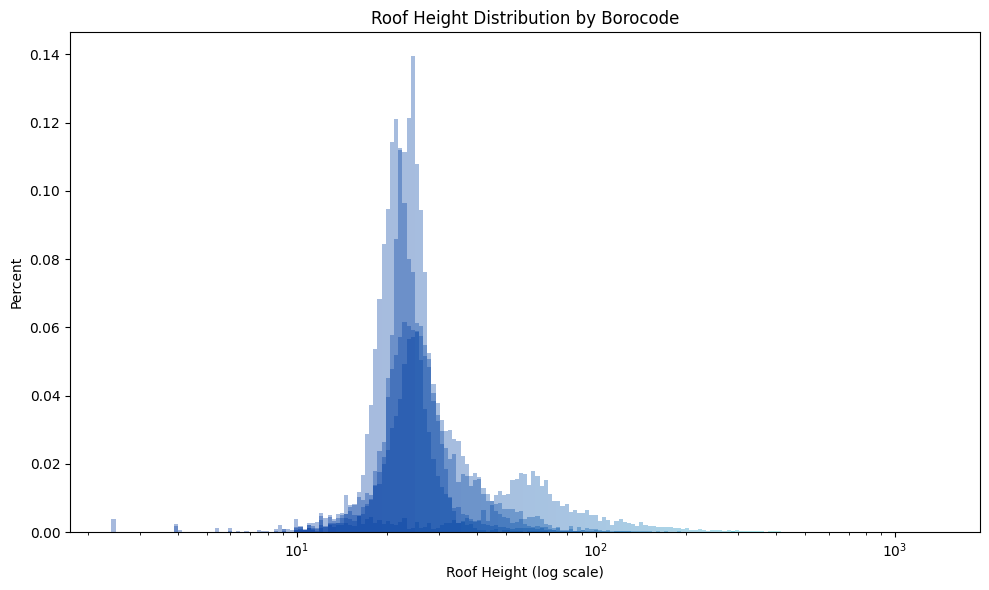

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    "height_cmap",
    [
        (0.00, "#0038a0ff"),  # min
        (0.25, "#1ed3daff"),  # p25
        (0.50, "#f3e962ff"),  # median
        (0.75, "#ff7a62ff"),  # p75
        (1.00, "#e00000ff")   # max
    ]
)

def colored_hist(ax, data, bins, cmap):
    counts, bin_edges, patches = ax.hist(
        data,
        bins=bins,
        density=True,
        alpha=0.35,
        edgecolor="none"
    )

    # Normalize to 0–1 for colormap
    norm = mcolors.Normalize(vmin=bins[0], vmax=bins[-1])

    for left, patch in zip(bin_edges[:-1], patches):
        patch.set_facecolor(cmap(norm(left)))
        
df2 = df[df["height_avg"] > 0]  # log requirement
xmin = df2["height_avg"].min()
xmax = df2["height_avg"].max()
bins = np.logspace(np.log10(xmin), np.log10(xmax), 200)

plt.figure(figsize=(10,6))

for b in [1,2,3,4,5]:
    g = df2[df2["borocode"] == b]["height_avg"].dropna()
    colored_hist(plt.gca(), g, bins, cmap)

plt.xscale("log")
plt.xlabel("Roof Height (log scale)")
plt.ylabel("Percent")
plt.title("Roof Height Distribution by Borocode")
plt.tight_layout()
plt.show()